#### Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#### Easy part

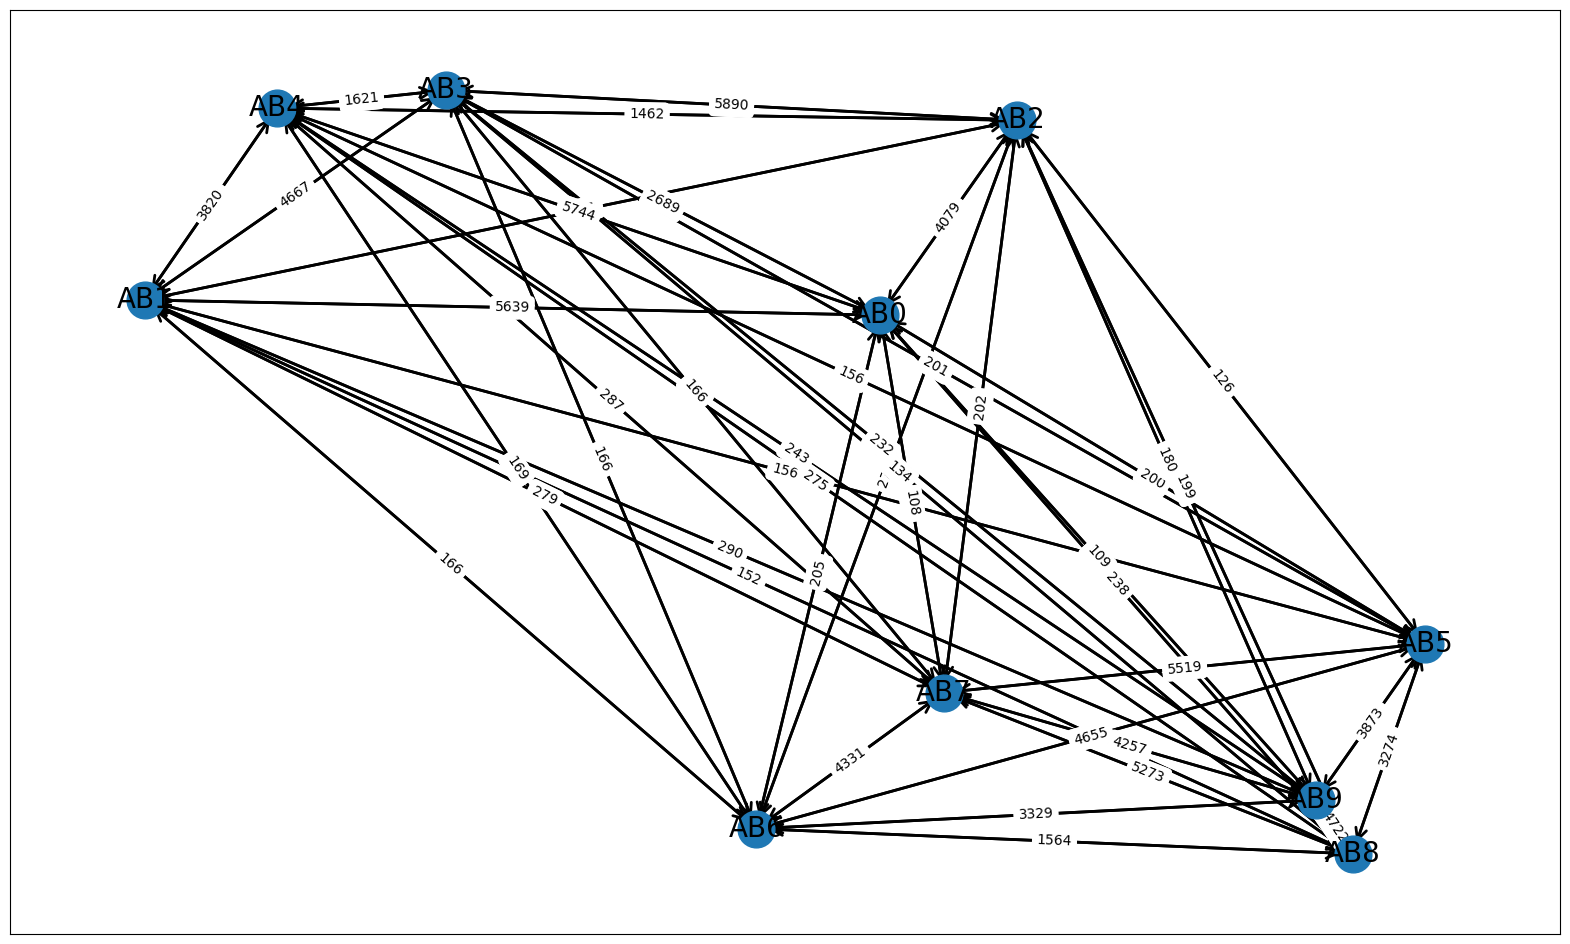

In [33]:
def ReadFile(f_name):
    dist = []
    line_nu = -1
    with open(f_name) as infile:
        for line in infile:
            line_nu += 1
            if line_nu == 0:
                index = int(line.split()[0]) * 2 + 1
            if line_nu >= index:
                temp = line.split()
                temp[2] = int(temp[2])
                temp[3] = int(temp[3])
                dist.append(temp)
            else:
                dist.append(line.split())
        info = dist[0:int(dist[0][0])*2+1]
        flights = dist[int(dist[0][0])*2+1:]
    return info, flights

flights=ReadFile("Flight connections dataset/1.in")[1]

def organize_flights_by_day(flight_list):
    # Create an empty dictionary to hold flights organized by day
    flights_by_day = {}

    # Iterate over each flight in the input list
    for flight in flight_list:
        # Extract the day from the flight entry
        day = flight[2]

        # Create a flight entry without the day
        flight_without_day = flight[:2] + flight[3:]

        # Add the flight to the corresponding day in the dictionary
        if day not in flights_by_day:
            flights_by_day[day] = []
        flights_by_day[day].append(flight_without_day)

    return flights_by_day

flights_per_day=organize_flights_by_day(flights)

def create_graph_for_day(flights_by_day, day):
    # Initialize a directed graph
    G = nx.DiGraph()

    # Add edges to the graph for the specified day
    for flight in flights_by_day.get(day, []):
        source, destination, weight = flight
        G.add_edge(source, destination, weight=weight)

    return G

def draw_graph(G, fig_size=(20, 12)):
    plt.figure(figsize=fig_size)  # Set the figure size

    pos = nx.spring_layout(G)  # positions for all nodes

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2, arrowstyle='->', arrowsize=20)

    # Draw the node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    # Draw the edge labels
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()
    
G_day_1 = create_graph_for_day(flights_per_day, 1)

draw_graph(G_day_1)

#### Multiple weights

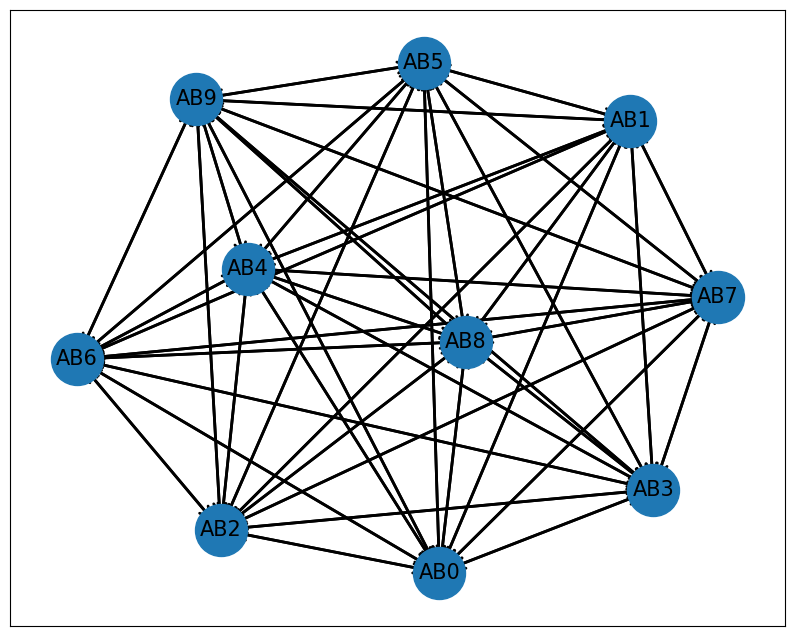

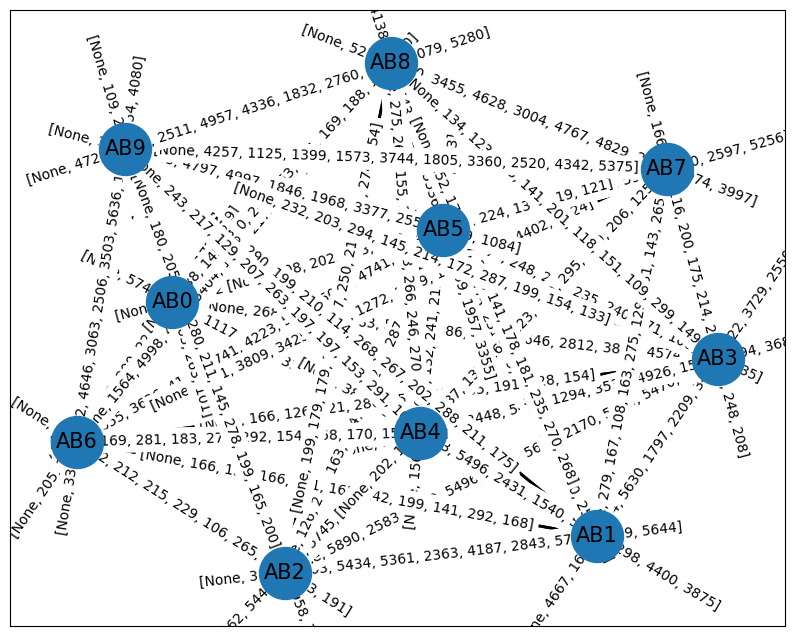

In [35]:
read_file=ReadFile("Flight connections dataset/1.in")

airports=read_file[0]
flights=read_file[1]


def organize_flights_with_weights_by_day(flight_list):
    flights_by_day = {}
    flight_weights = {}

    for flight in flight_list:
        source, destination, day, weight = flight[0], flight[1], flight[2], flight[3]

        if (source, destination) not in flight_weights:
            flight_weights[(source, destination)] = []

        while len(flight_weights[(source, destination)]) <= day:
            flight_weights[(source, destination)].append(None)  # Ensure list has enough entries

        flight_weights[(source, destination)][day] = weight

    return flight_weights

flights_per_day = organize_flights_with_weights_by_day(flights)

def create_graph_with_multiple_weights(flight_weights):
    G = nx.DiGraph()

    for (source, destination), weights in flight_weights.items():
        G.add_edge(source, destination, weights=weights)

    return G

G = create_graph_with_multiple_weights(flights_per_day)

def draw_graph_with_multiple_weights(G, fig_size=(10, 8), show_weights=True):
    plt.figure(figsize=fig_size)  # Set the figure size

    pos = nx.spring_layout(G)  # positions for all nodes

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=1400)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2, arrowstyle='->', arrowsize=20)

    # Draw the node labels
    nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')

    if show_weights:
        # Draw the edge labels with multiple weights
        edge_labels = {(u, v): f"{d['weights']}" for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

# Usage example:
draw_graph_with_multiple_weights(G, show_weights=False)  # Hide weights
draw_graph_with_multiple_weights(G, show_weights=True)   # Show weights

#### Optimisation

In [17]:
read_file=ReadFile("Flight connections dataset/5.in")

airports=read_file[0]
flights=read_file[1]

airports

[['46', 'RCF'],
 ['zone0'],
 ['RCF', 'ADQ', 'IUN'],
 ['zone1'],
 ['EQP', 'GHV', 'NLN'],
 ['zone2'],
 ['LZS', 'TTX', 'YRI'],
 ['zone3'],
 ['FWF', 'NMV', 'ZAK'],
 ['zone4'],
 ['AON', 'KVT', 'HMD'],
 ['zone5'],
 ['BPA', 'YBJ', 'DVV'],
 ['zone6'],
 ['MGY', 'FWH', 'QRO'],
 ['zone7'],
 ['LQP', 'GWQ', 'BCZ'],
 ['zone8'],
 ['RZA', 'KNE', 'GYA'],
 ['zone9'],
 ['JRJ', 'MCG', 'NTC'],
 ['zone10'],
 ['EHO', 'DPQ', 'GON'],
 ['zone11'],
 ['EIF', 'RQW', 'CWG'],
 ['zone12'],
 ['JAQ', 'ZOF', 'ZQX'],
 ['zone13'],
 ['UCF', 'QSP', 'HQY'],
 ['zone14'],
 ['MWE', 'NJO', 'SNT'],
 ['zone15'],
 ['EGM', 'BWP', 'UHT'],
 ['zone16'],
 ['LGI', 'FUO', 'ZRR'],
 ['zone17'],
 ['HGY', 'ZGX', 'TER'],
 ['zone18'],
 ['FNO', 'HBR', 'ZJY'],
 ['zone19'],
 ['JSF', 'CNK', 'EHJ'],
 ['zone20'],
 ['GSW', 'SSU', 'ZDF'],
 ['zone21'],
 ['MLL', 'EIA', 'GSA'],
 ['zone22'],
 ['QUZ', 'NCN', 'YEN'],
 ['zone23'],
 ['FED', 'YPF', 'CIE'],
 ['zone24'],
 ['SMM', 'UVM', 'UAB'],
 ['zone25'],
 ['MUD', 'UCB', 'UPJ'],
 ['zone26'],
 ['AVC', 'YHU', 'IK

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Parse the airports data
def parse_airports(airports_data):
    num_zones = int(airports_data[0][0])
    zones = {}
    current_zone = -1

    for entry in airports_data[1:]:
        if not entry[0].isupper():  # Assuming zone names are not in uppercase
            current_zone += 1
            zones[current_zone] = []
        else:
            zones[current_zone].append(entry[0])
    
    return num_zones, zones

# Step 2: Find the cheapest flight from one zone to the next on a specific day
def find_cheapest_flight_between_zones(G, zones, current_zone, next_zone, day):
    min_cost = float('inf')
    best_flight = None

    for airport_from in zones[current_zone]:
        for airport_to in zones[next_zone]:
            if G.has_edge(airport_from, airport_to):
                weights = G[airport_from][airport_to]['weights']
                if weights[day] is not None and weights[day] < min_cost:
                    min_cost = weights[day]
                    best_flight = (airport_from, airport_to, min_cost)

    return best_flight

# Step 3: Iterate through the zones to find the cheapest path
def find_cheapest_path(G, zones, start_zone, num_zones):
    path = []
    total_cost = 0

    for day in range(num_zones - 1):
        current_zone = day
        next_zone = day + 1
        best_flight = find_cheapest_flight_between_zones(G, zones, current_zone, next_zone, day)

        if best_flight:
            path.append(best_flight)
            total_cost += best_flight[2]
        else:
            return None, float('inf')  # No available flight

    return path, total_cost

# Example usage:
def ReadFile(f_name):
    dist = []
    line_nu = -1
    with open(f_name) as infile:
        for line in infile:
            line_nu += 1
            if line_nu == 0:
                index = int(line.split()[0]) * 2 + 1
            if line_nu >= index:
                temp = line.split()
                temp[2] = int(temp[2])
                temp[3] = int(temp[3])
                dist.append(temp)
            else:
                dist.append(line.split())
        info = dist[0:int(dist[0][0])*2+1]
        flights = dist[int(dist[0][0])*2+1:]
    return info, flights

def organize_flights_with_weights_by_day(flight_list):
    flight_weights = {}

    for flight in flight_list:
        source, destination, day, weight = flight[0], flight[1], flight[2], flight[3]

        if (source, destination) not in flight_weights:
            flight_weights[(source, destination)] = []

        while len(flight_weights[(source, destination)]) <= day:
            flight_weights[(source, destination)].append(None)  # Ensure list has enough entries

        flight_weights[(source, destination)][day] = weight

    return flight_weights

def create_graph_with_multiple_weights(flight_weights):
    G = nx.DiGraph()

    for (source, destination), weights in flight_weights.items():
        G.add_edge(source, destination, weights=weights)

    return G

def draw_graph_with_multiple_weights(G, fig_size=(10, 8), show_weights=True):
    plt.figure(figsize=fig_size)  # Set the figure size

    pos = nx.spring_layout(G)  # positions for all nodes

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2, arrowstyle='->', arrowsize=20)

    # Draw the node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    if show_weights:
        # Draw the edge labels with multiple weights
        edge_labels = {(u, v): f"{d['weights']}" for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

# Read and process the data
airports_data, flights = ReadFile("Flight connections dataset/10.in")
airports = airports_data
num_zones, zones = parse_airports(airports)

flights_per_day = organize_flights_with_weights_by_day(flights)
G = create_graph_with_multiple_weights(flights_per_day)

# Find the cheapest path from zone 0 to zone N
path, total_cost = find_cheapest_path(G, zones, start_zone=0, num_zones=num_zones)

print("Cheapest path:", path)
print("Total cost:", total_cost)

Cheapest path: None
Total cost: inf
